In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv("credit_scoring_eng.csv")

df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
df['days_employed'] = df['days_employed'].abs()
df['years_employed'] = df['days_employed'] / 365
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase,11.026860
2,0,5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding,932.235814


In [2]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
 12  years_employed    19351 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB
None
           children  days_employed     dob_years  education_id  \
count  21525.000000   19351.000000  21525.000000  215

In [3]:
print(df.groupby('debt').mean(numeric_only=True))

print(pd.crosstab(df['education'].str.lower().str.strip(), df['debt']))

      children  days_employed  dob_years  education_id  family_status_id  \
debt                                                                       
0     0.531338   68942.985506  43.553073      0.808633          0.963860   
1     0.624928   43959.666946  40.342332      0.914991          1.071223   

       total_income  years_employed  
debt                                 
0     167804.131651      188.884892  
1     163100.897062      120.437444  
debt                     0     1
education                       
academic degree          6     0
bachelor degree        676    68
masters degree        4982   278
primary education      251    31
secondary education  13869  1364


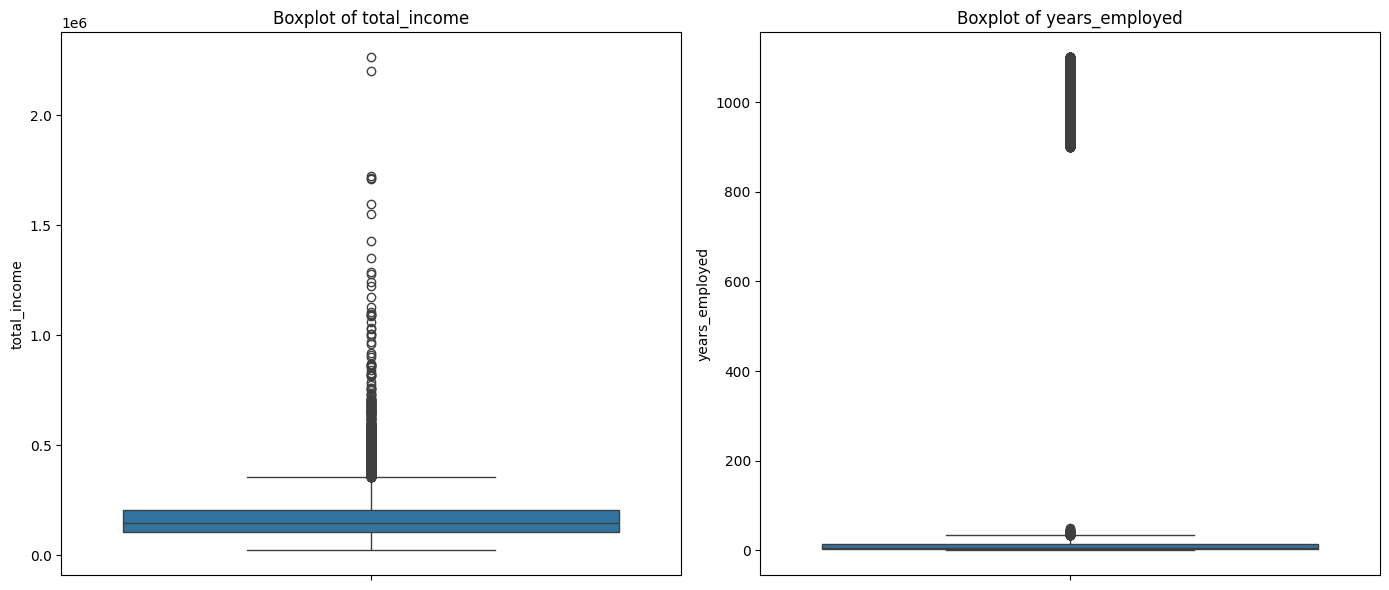

In [4]:
numerical_cols = ['total_income', 'years_employed']
plt.figure(figsize=(14, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [5]:
z_scores = np.abs(stats.zscore(df[numerical_cols]))
outliers_z = (z_scores > 3).any(axis=1)
print("Z-score outliers:", outliers_z.sum())

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("IQR outliers:", outliers_iqr.sum())

Z-score outliers: 0
IQR outliers: 4253


In [6]:
# Cap outliers using IQR
df_capped = df.copy()
for col in numerical_cols:
    q1 = df_capped[col].quantile(0.25)
    q3 = df_capped[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df_capped[col] = np.where(df_capped[col] > upper, upper,
                              np.where(df_capped[col] < lower, lower, df_capped[col]))

In [7]:
df_encoded = pd.get_dummies(df_capped, columns=['education', 'family_status', 'gender', 'income_type', 'purpose'])

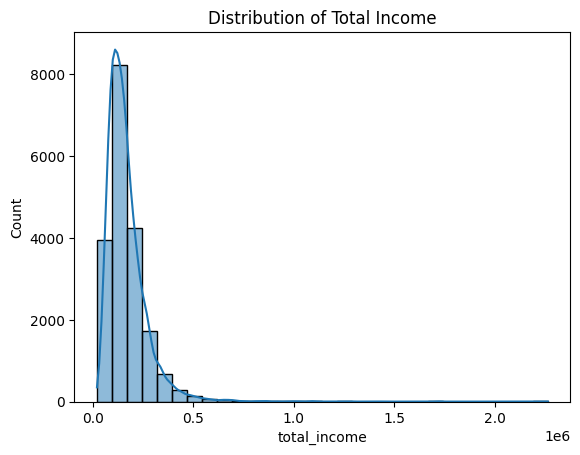

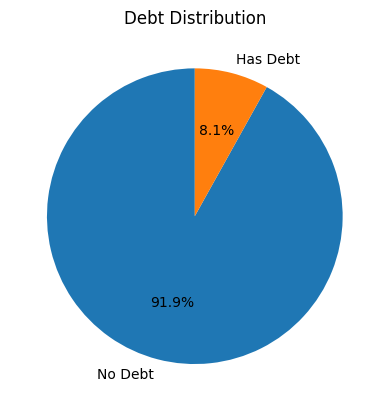

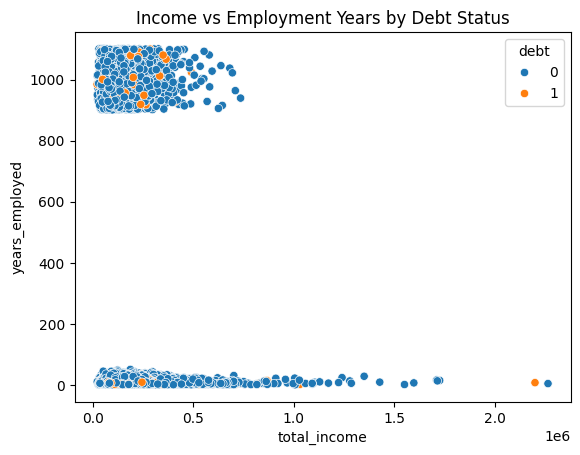

In [8]:
sns.histplot(df['total_income'], bins=30, kde=True)
plt.title("Distribution of Total Income")
plt.show()

df['debt'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=["No Debt", "Has Debt"])
plt.title("Debt Distribution")
plt.ylabel("")
plt.show()

sns.scatterplot(x='total_income', y='years_employed', hue='debt', data=df)
plt.title("Income vs Employment Years by Debt Status")
plt.show()

In [9]:
df_capped.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,years_employed
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000,19351.000000
mean,0.538908,66914.728907,43.293380,0.817236,0.972544,0.080883,161753.466081,11.358421
std,1.381587,139030.880527,12.574584,0.548138,1.420324,0.272661,77950.722581,12.002136
min,-1.000000,24.141633,0.000000,0.000000,0.000000,0.000000,20667.263793,0.066141
25%,0.000000,927.009265,33.000000,1.000000,0.000000,0.000000,103053.152913,2.539751
50%,0.000000,2194.220567,42.000000,1.000000,0.000000,0.000000,145017.937533,6.011563
75%,1.000000,5537.882441,53.000000,1.000000,1.000000,0.000000,203435.067663,15.172281
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,354007.939788,34.121075
